In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
import seaborn as sns
from scipy import stats

In [35]:
!pip install matplotlib

In [2]:
import statsmodels.formula.api as smf

In [3]:
import statsmodels.api as sm

In [4]:
import seaborn as sns

In [5]:
dlt=pd.read_csv ("D://Data Science/Assignments/4-Simple Linear Regression/delivery_time.csv")

In [7]:
dlt.head(10)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [8]:
dlt.columns=['Delivery', 'Sorting']

In [9]:
dlt

,Delivery,Sorting
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [10]:
dlt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Delivery  21 non-null     float64
 1   Sorting   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [11]:
dlt.corr()

,Delivery,Sorting
Delivery,1.000000,0.825997
Sorting,0.825997,1.000000


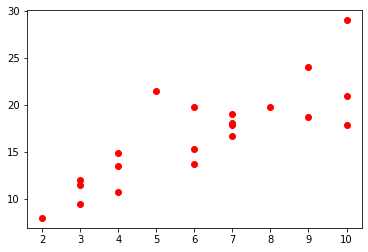

In [19]:
plt.scatter(dlt['Sorting'],dlt['Delivery'],color='red')

In [21]:
#Build Model
model=smf.ols('Delivery~Sorting', data=dlt).fit()

In [23]:
model.params

Intercept    6.582734
Sorting      1.649020
dtype: float64

In [24]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 03 Nov 2020   Prob (F-statistic):           3.98e-06
Time:                        06:25:25   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
Sorting        1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
print(model.conf_int(0.05))

                  0          1
Intercept  2.979134  10.186334
Sorting    1.108673   2.189367


In [42]:
pred=model.predict(dlt.iloc[:,1])
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

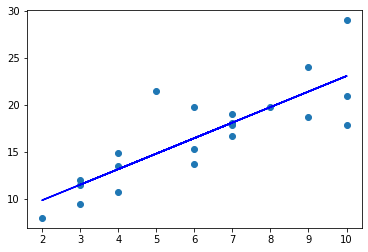

In [45]:
plt.scatter(x=dlt['Sorting'],y=dlt['Delivery'])
plt.plot(dlt['Sorting'], pred, color='blue')

In [54]:
pred.corr(dlt.Delivery)

0.8259972607955325

In [31]:
new=pd.Series([10,4])
dlt1=pd.DataFrame(new,columns=['Sorting'])
dlt1

,Sorting
0,10
1,4


In [32]:
pred=model.predict(dlt1)
pred

0    23.072933
1    13.178814
dtype: float64

In [48]:
model2=smf.ols('Delivery~np.log(Sorting)', data=dlt). fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Delivery   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 03 Nov 2020   Prob (F-statistic):           2.64e-06
Time:                        06:46:32   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
pred2=model2.predict(dlt['Sorting'])
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [53]:
pred2.corr(dlt.Delivery)

0.8339325279256244

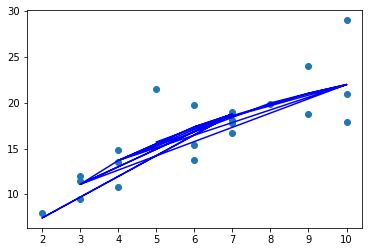

In [58]:
plt.scatter(x=dlt['Sorting'],y=dlt['Delivery'])
plt.plot(dlt['Sorting'], pred2, color='blue')

In [56]:
model3=smf.ols('np.log(Delivery)~Sorting', data=dlt). fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(Delivery)   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Tue, 03 Nov 2020   Prob (F-statistic):           1.59e-06
Time:                        06:56:21   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1214      0.103     20.601      0.000       1.906       2.337
Sorting        0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
pred_log=model3.predict(dlt['Sorting'])
pred_log

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [62]:
pred3=np.exp(pred_log)
pred3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [64]:
pred3.corr(dlt.Delivery)

0.808578010828926

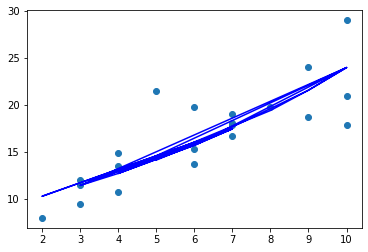

In [63]:
plt.scatter(x=dlt['Sorting'],y=dlt['Delivery'])
plt.plot(dlt['Sorting'], pred3, color='blue')

In [65]:
dlt['Sor_Sq']=dlt.Sorting*dlt.Sorting
dlt['Sor_Sq']

0     100
1      16
2      36
3      81
4     100
5      36
6      49
7       9
8     100
9      81
10     64
11     16
12     49
13      9
14      9
15     16
16     36
17     49
18      4
19     49
20     25
Name: Sor_Sq, dtype: int64

In [67]:
model_sq=smf.ols('np.log(Delivery)~Sorting+Sor_Sq', data=dlt).fit()
model_sq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       np.log(Delivery)   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     29.28
Date:                Tue, 03 Nov 2020   Prob (F-statistic):           2.20e-06
Time:                        11:01:50   Log-Likelihood:                 9.9597
No. Observations:                  21   AIC:                            -13.92
Df Residuals:                      18   BIC:                            -10.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6997      0.228      7.441      0.000       1.220       2.180
Sorting        0.2659      0.080      3.315      0.004       0.097       0.434
Sor_Sq        -0.0128      0.006     -2.032      0.057      -0.026       0.000
==============================================================================
Omnibus:                        2.548   Durbin-Watson:                   1.369
Prob(Omnibus):                  0.280   Jarque-Bera (JB):                1.777
Skew:                           0.708   Prob(JB):                        0.411
Kurtosis:                       2.846   Cond. No.                         373.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
pred_sq=model_sq.predict(dlt)
pred_sq

0     3.074863
1     2.557942
2     2.832974
3     3.052913
4     3.074863
5     2.832974
6     2.931968
7     2.381905
8     3.074863
9     3.052913
10    3.005281
11    2.557942
12    2.931968
13    2.381905
14    2.381905
15    2.557942
16    2.832974
17    2.931968
18    2.180186
19    2.931968
20    2.708299
dtype: float64

In [71]:
pred4=np.exp(pred_sq)
pred4

0     21.646921
1     12.909227
2     16.995933
3     21.176938
4     21.646921
5     16.995933
6     18.764526
7     10.825502
8     21.646921
9     21.176938
10    20.191891
11    12.909227
12    18.764526
13    10.825502
14    10.825502
15    12.909227
16    16.995933
17    18.764526
18     8.847949
19    18.764526
20    15.003730
dtype: float64

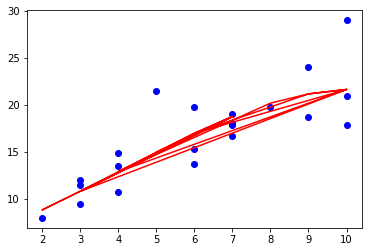

In [73]:
plt.scatter(dlt.Sorting,dlt.Delivery,c="b")
plt.plot(dlt.Sorting,pred4,"r")